In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

# Read the dataset

df = pd.read_csv('googleplaystore.csv')

# Check the first few rows

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
df.isnull().sum()

# Drop rows with missing values in important columns
df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'],
inplace=True)

# Check the updated data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [7]:
# Replace 'Everyone' with '0' in 'Price'
# df["Price"] = df["Price"].replace("Everyone", "0")

# Convert 'Price' column (removing '$')
# df["Price"] = df["Price"].str.replace("$", "").astype(float)

# Display updated data types
df.dtypes[["Reviews", "Size", "Installs", "Price"]]
df.head()
df.to_csv("changes.csv")


In [15]:
print(df[df["Reviews"].str.contains("M|k|Free", na=False)])

                                           App Category  Rating Reviews  Size  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   NaN   

      Installs Type  Price Content Rating             Genres Last Updated  \
10472     Free    0    0.0            NaN  February 11, 2018       1.0.19   

      Current Ver Android Ver  
10472  4.0 and up         NaN  


In [17]:
def clean_installs(value):
    if isinstance(value, str):
        value = value.replace(",", "").replace("+", "").strip()
        if "M" in value:
            return int(float(value.replace("M", "")) * 1_000_000)
        elif "k" in value:
            return int(float(value.replace("k", "")) * 1_000)
        elif value.isnumeric():
            return int(value)
    return None  # Return None for invalid cases

df["Reviews"] = df["Reviews"].apply(clean_installs)


In [8]:
def convert_size(size):
    if 'M' in size:

        return float(size.replace('M', ''))
    elif 'k' in size:

        return float(size.replace('k', '')) / 1000
    else:

        return np.nan

df['Size'] = df['Size'].apply(convert_size)

In [18]:
df.to_csv("rating_pred.csv")

In [19]:
df.duplicated().sum()

474

In [20]:
df.drop_duplicates(inplace=True)

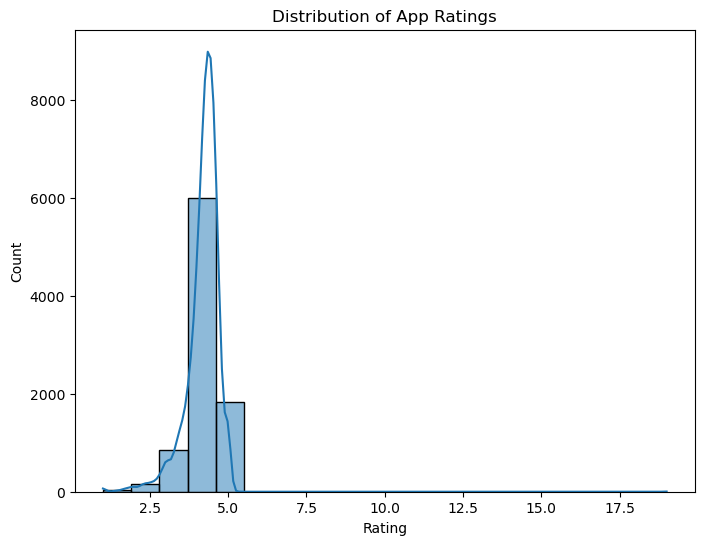

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_92234/2211488583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values,


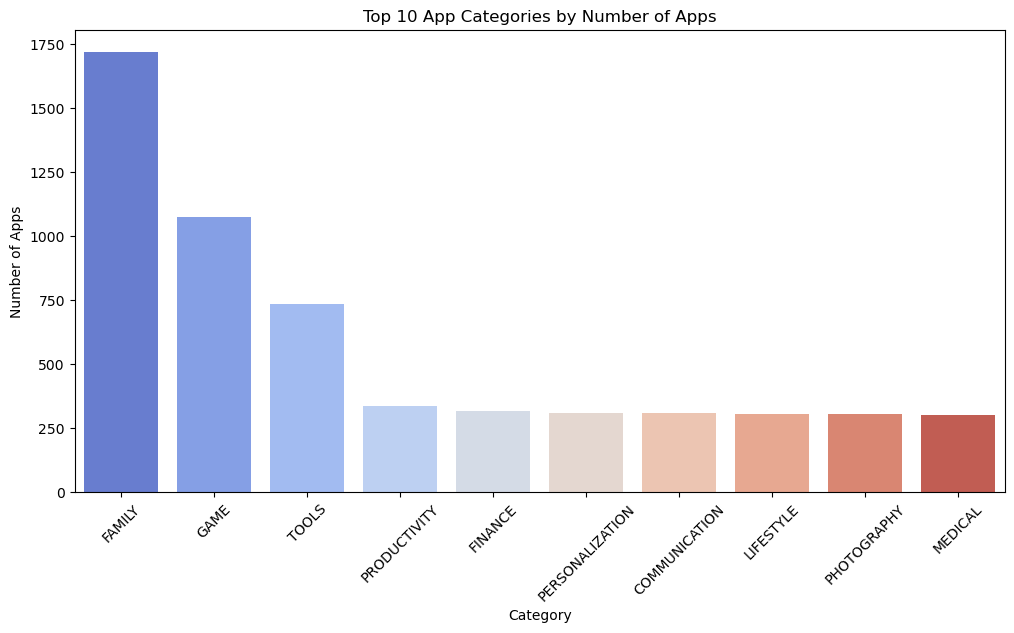

In [22]:
plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values,
palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

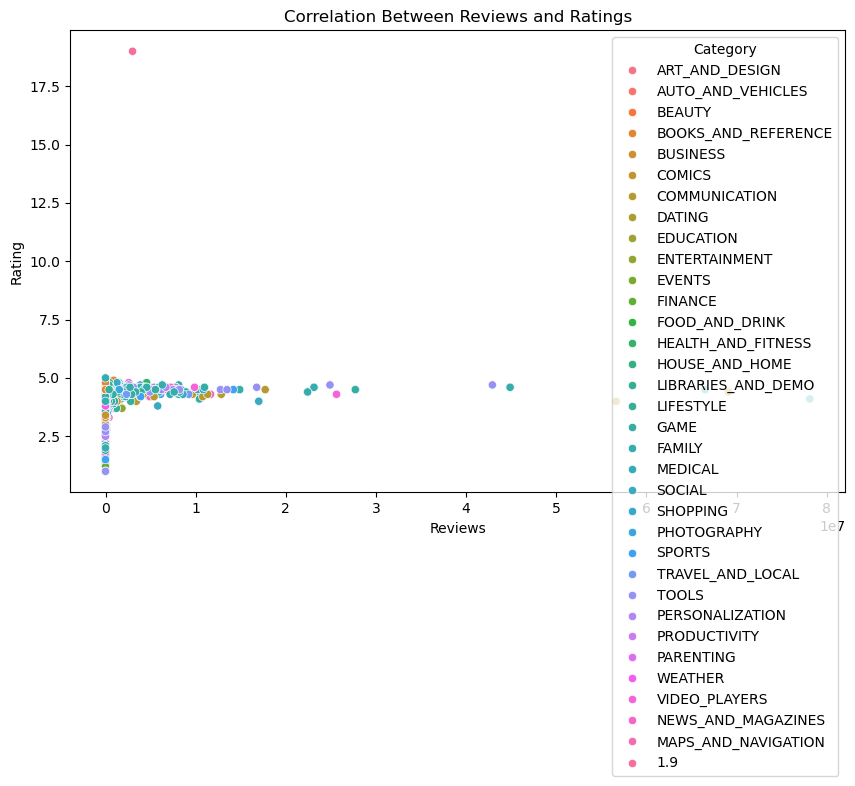

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Reviews', y='Rating', data=df, hue='Category')
plt.title('Correlation Between Reviews and Ratings')
plt.show()

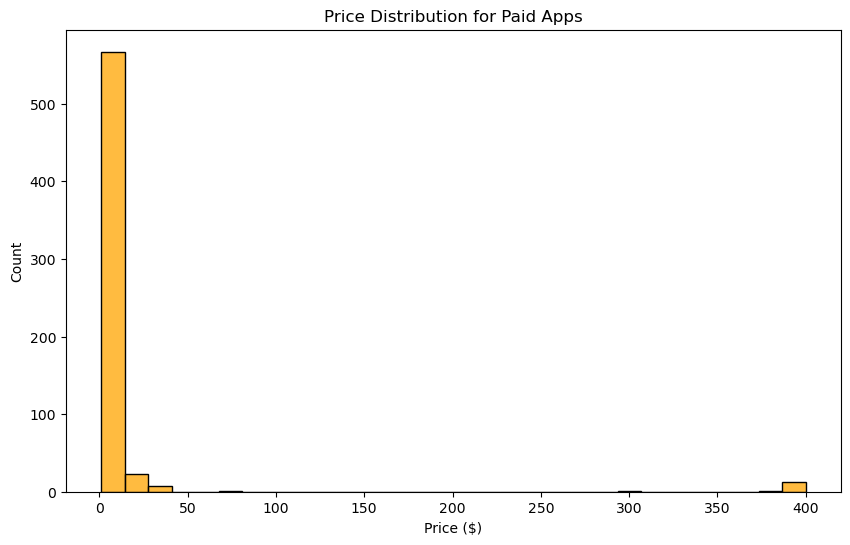

In [25]:
paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(10,6))
sns.histplot(paid_apps['Price'], bins=30, color='orange')
plt.title('Price Distribution for Paid Apps')

plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

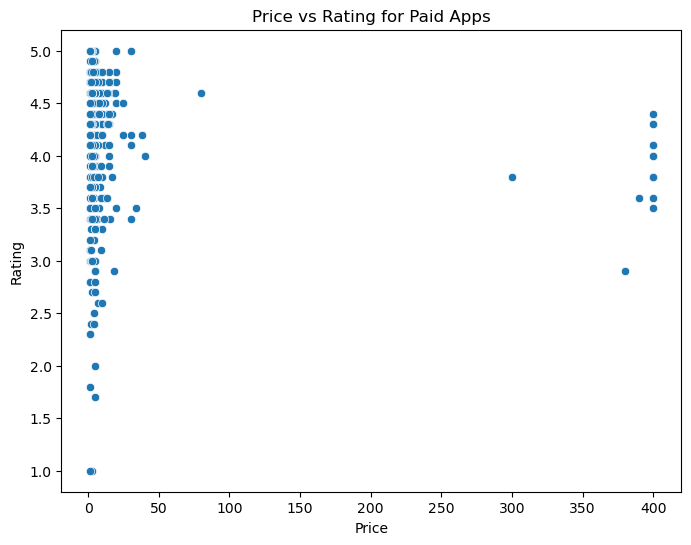

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Price vs Rating for Paid Apps')
plt.show()

/tmp/ipykernel_92234/50069055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_ratings.index, y=content_ratings.values,


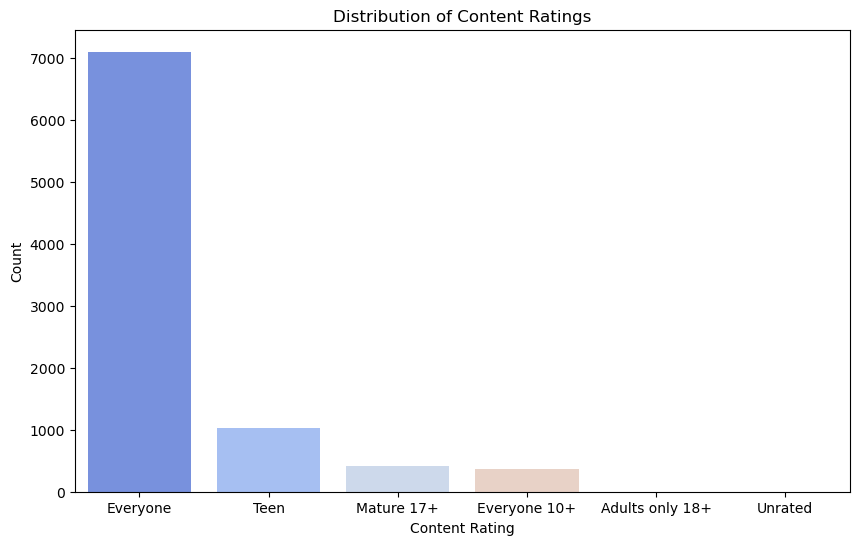

In [27]:
plt.figure(figsize=(10,6))
content_ratings = df['Content Rating'].value_counts()
sns.barplot(x=content_ratings.index, y=content_ratings.values,
palette='coolwarm')

plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_92234/2947675230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')


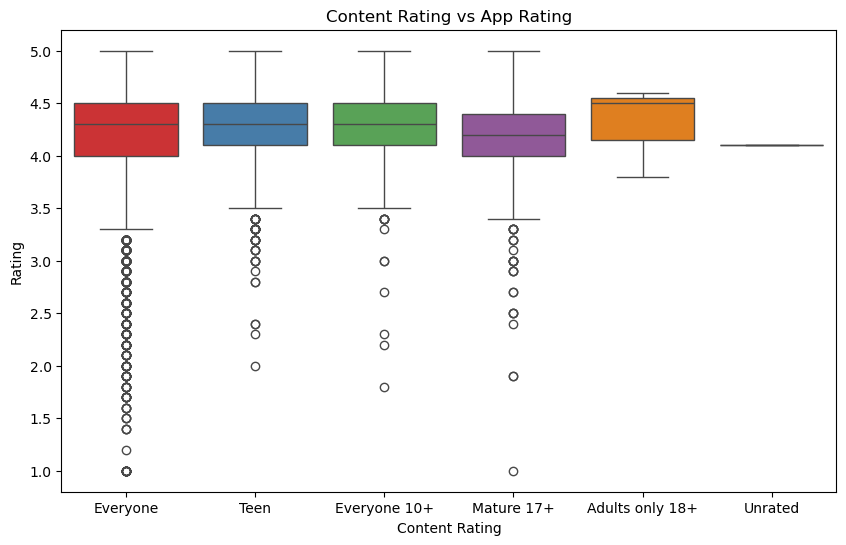

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')
plt.title('Content Rating vs App Rating')
plt.show()

/tmp/ipykernel_92234/2643898043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_installs.index,


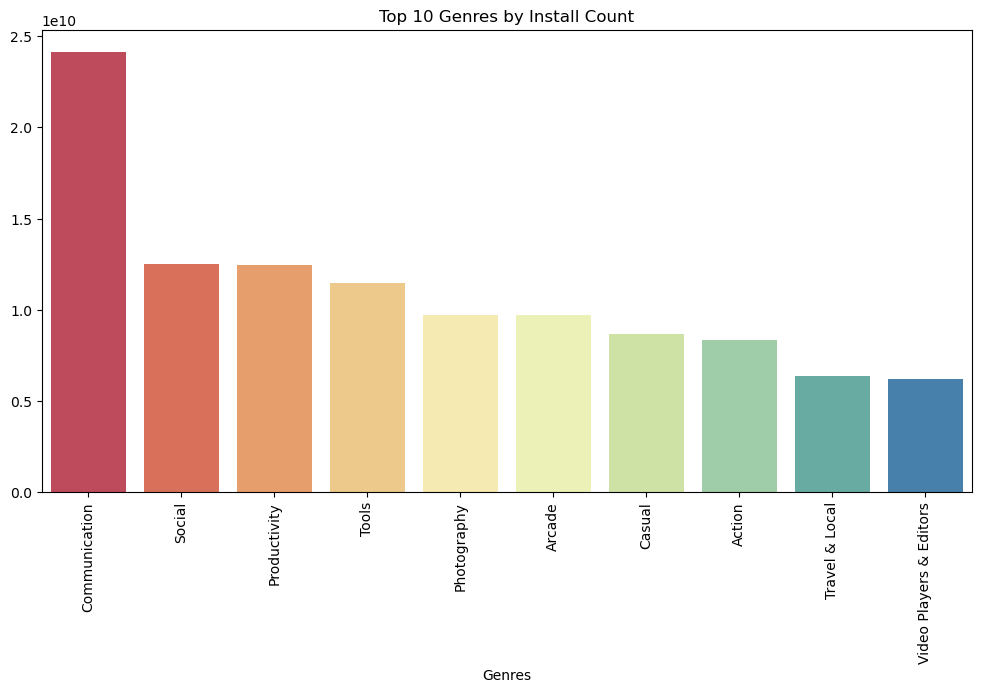

In [30]:
plt.figure(figsize=(12,6))
top_genres_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_genres_installs.index,
y=top_genres_installs.values, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Top 10 Genres by Install Count')
plt.show()